In [8]:
! pip install logomaker

# Plot sequence log with frequency at each position

    A   C   G   T
0  80   5   7   8
1   5   7  79   9
2   7  73   8  12
3  49  34   7  10
4  23  18  19  20
5  35  25  11   9
6  17   7  28  18
          A       C       G         T
0  0.800000  0.0500  0.0700  0.080000
1  0.050000  0.0700  0.7900  0.090000
2  0.070000  0.7300  0.0800  0.120000
3  0.490000  0.3400  0.0700  0.100000
4  0.287500  0.2250  0.2375  0.250000
5  0.437500  0.3125  0.1375  0.112500
6  0.242857  0.1000  0.4000  0.257143


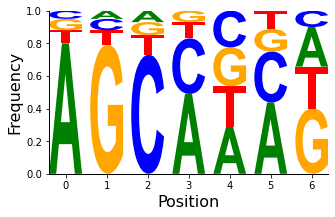

In [9]:
import logomaker
import pandas as pd
import matplotlib.pyplot as plt


# Create dataframe with counts of each nucleotide at each position in the motif
df = pd.DataFrame({'A': [80, 5, 7, 49, 23,35,17],
                   'C': [5, 7,  73, 34, 18,25,7],
                   'G': [7, 79, 8, 7, 19,11,28],
                   'T': [8, 9, 12, 10, 20,9,18]})

print(df)

# Convert counts to probabilities
df = df.apply(lambda x: x/x.sum(), axis=1)

print(df)

# Create logo object and customize plot

logo = logomaker.Logo(df, color_scheme='classic', width=.8, stack_order='small_on_top', 
                      font_name='Arial',figsize=(5,3))

logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#logo.ax.set_title('DNA Binding Motif', fontsize=20)
logo.ax.set_xlabel('Position', fontsize=16)
logo.ax.set_ylabel('Frequency', fontsize=16)


plt.show()

## Plot sequence log with information content

    A   C   G   T
0  80   5   7   8
1   5   7  79   9
2   7  73   8  12
3  49  34   7  10
4  23  18  19  20
5  35  25  11   9
6  17   7  28  18


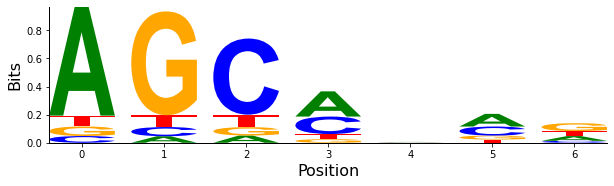

In [7]:
import numpy as np

df = pd.DataFrame({'A': [80, 5, 7, 49, 23,35,17],
                   'C': [5, 7,  73, 34, 18,25,7],
                   'G': [7, 79, 8, 7, 19,11,28],
                   'T': [8, 9, 12, 10, 20,9,18]})

print(df)

freq_matrix = df.div(df.sum(axis=1), axis=0)

ic_matrix = freq_matrix * np.log2(freq_matrix)

ic_position = ic_matrix.sum(axis=1)


# normalize the information content at each position
norm_ic = np.log2(4) + ic_position

ic_matrix = freq_matrix.multiply(norm_ic,axis=0)

# calculate the information content at each position


logo = logomaker.Logo(ic_matrix, color_scheme='classic', width=.8, stack_order='big_on_top', font_name='Arial')

logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#logo.ax.set_title('DNA Binding Motif', fontsize=20)
logo.ax.set_xlabel('Position', fontsize=16)
logo.ax.set_ylabel('Bits', fontsize=16)


plt.show()

# Plot sequence log with log odd ratio

In [63]:
df_odd = pd.read_excel('LogOddRatio.xlsx',index_col=0)

print(df_odd)

           A         T         C         G
20  0.726670 -0.378654 -0.513562  0.559616
19  0.200671  0.052644 -0.223144  0.180262
18  0.287682  0.179586 -0.459532  0.145182
17 -0.072321 -0.703958  0.038221  0.709148
16 -0.395313  0.045120  0.306031  0.173272
15  0.065383 -0.203228  0.109199  0.184429
14  0.026668 -0.246860  0.075986  0.318454
13 -0.014185 -0.259958 -0.199489  0.547295
12  0.184922 -0.488353 -0.093090  0.448390
11  0.548566 -0.581356 -0.255525  0.446850
10  0.463285 -0.763351  0.085942  0.445074
9   0.151806 -0.298982 -0.047628  0.320669
8  -0.693147 -0.245835  0.535143  0.382992
7   0.448549  0.101352 -0.093090 -0.174353
6   0.077962 -0.498991  0.343772  0.104140
5   0.597837 -0.216671 -0.190518  0.011300
4   0.223144 -0.331777 -0.269920  0.468266
3  -0.103990 -0.444251  0.305382  0.336472
2  -0.752336 -0.456758  0.473519  0.538997
1  -0.237959 -0.262364 -0.559616  1.064711


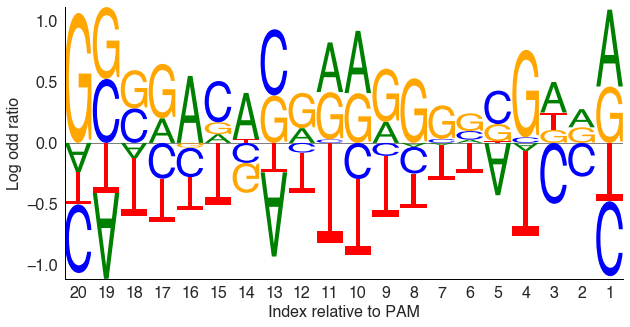

In [74]:
import matplotlib.pyplot as plt
import logomaker

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Helvetica"

crp_logo= logomaker.Logo(df_odd,center_values=True,font_name='Helvetica',figsize=(10,5))#shade_below=.6,fade_below=.6,

crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_ylabel('Log odd ratio')
crp_logo.ax.set_xlabel('Index relative to PAM')
#plt.yticks([-0.5,0,0.5])
plt.xticks(range(1,21),range(1,21)[::-1])
plt.savefig('Log_odd_ratio.png',dpi=300,facecolor='white')
plt.show()
